<a href="https://colab.research.google.com/github/JavZon/Classification-Algoritms/blob/main/KNN_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
link='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv'
df=pd.read_csv(link)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(columns='id', inplace=True)

B stands for benign (no cancer). M stands for malignant (cancer)

In [6]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace=True)

In [8]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

**Correlation**

In [9]:
corr=df.corrwith(df['diagnosis']).sort_values(ascending=False)
corr

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

The correlation table depicts that even if we have 32 column in our dataset only 12 of them have **strong(or medium)** & (corr>0.50) correlation with final result( diagnosis). So we drop unnecessary columns so that our model will not be too complex

In [10]:
ind=corr.index[corr>0.58]

In [11]:
df=df[ind]
df.head()

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst
0,1,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656
1,1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866
2,1,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.15990,0.4245
3,1,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.28390,0.8663
4,1,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.13280,0.2050


**Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=df.drop(columns='diagnosis')
y=df['diagnosis'].copy()
X=scaler.fit_transform(X)

In [13]:
len(X)

569

**train_test_split**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_label, y_test_label=train_test_split(X, y, test_size=0.2, random_state=142)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train_label.shape)
print(y_test_label.shape)

(455, 12)
(114, 12)
(455,)
(114,)


**ML**

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train_label)

KNeighborsClassifier(n_neighbors=6)

**Prediction**

In [17]:
y_pred=knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_score=accuracy_score(y_test_label, y_pred)
con_matrix=confusion_matrix(y_test_label, y_pred)
class_report=classification_report(y_test_label, y_pred)
print(f'Accuracy Score: {acc_score}')
print(f'Confusion Matrix: \n{con_matrix}')
print(f'Classification Report: \n{class_report}')


Accuracy Score: 0.956140350877193
Confusion Matrix: 
[[65  2]
 [ 3 44]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



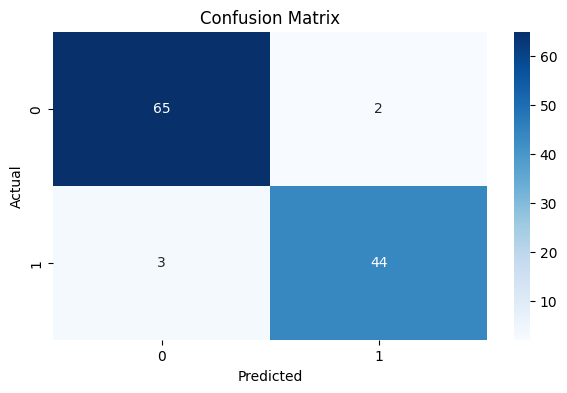

In [19]:
plt.figure(figsize=(7, 4))
sns.heatmap(con_matrix, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
from sklearn.metrics import jaccard_score,f1_score

print("Jaccard score =",jaccard_score(y_test_label, y_pred))

Jaccard score = 0.8979591836734694


Finding the best **k** using **for** loop

In [21]:
f1=[]
for k in range(1,25):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train_label)
  y_pred=knn.predict(X_test)
  f1_sc=f1_score(y_test_label,y_pred)
  f1.append(f1_sc)

In [22]:
f1

[0.9387755102040817,
 0.9347826086956522,
 0.9263157894736843,
 0.9462365591397849,
 0.9166666666666666,
 0.9462365591397849,
 0.9263157894736843,
 0.9462365591397849,
 0.9263157894736843,
 0.9263157894736843,
 0.9263157894736843,
 0.9263157894736843,
 0.9263157894736843,
 0.9361702127659575,
 0.9263157894736843,
 0.9263157894736843,
 0.9375000000000001,
 0.9263157894736843,
 0.9263157894736843,
 0.9361702127659575,
 0.9263157894736843,
 0.9263157894736843,
 0.9375000000000001,
 0.9263157894736843]

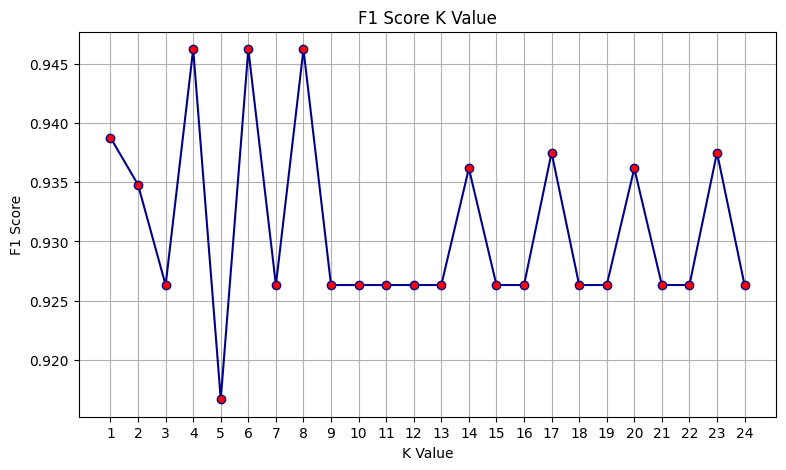

In [28]:
plt.figure(figsize=(9, 5))
plt.plot(range(1,25),f1, color='darkblue', marker='o', markerfacecolor='r')
plt.grid()
plt.xticks(range(1,25))
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.show()

***GridSearchCV***

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,25)}
knn_grid_cv=GridSearchCV(knn, param_grid, cv=5)
knn_grid_cv.fit(X_train, y_train_label)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [43]:
knn_grid_cv.cv_results_

{'mean_fit_time': array([0.00111909, 0.00119615, 0.00091739, 0.00087614, 0.00102978,
        0.00094161, 0.00090814, 0.00088849, 0.00093637, 0.00091767,
        0.00089169, 0.00092773, 0.00094171, 0.00090041, 0.00110335,
        0.00092974, 0.00091133, 0.00089402, 0.00088329, 0.00090647,
        0.00086603, 0.00100212, 0.00089321, 0.00086126]),
 'std_fit_time': array([3.75495968e-04, 3.04523942e-04, 3.92183417e-05, 2.35469701e-05,
        1.34423296e-04, 4.32261760e-05, 3.55986963e-05, 3.30794416e-05,
        1.18566554e-04, 6.48116252e-05, 3.48958802e-05, 6.56583124e-05,
        1.17178926e-04, 3.76286459e-05, 1.66622583e-04, 5.66581274e-05,
        5.14229911e-05, 4.08127484e-05, 3.42060125e-05, 4.91001053e-05,
        1.18334421e-05, 2.42216352e-04, 3.60813575e-05, 1.34385198e-05]),
 'mean_score_time': array([0.00661225, 0.00738778, 0.00577207, 0.005865  , 0.00602808,
        0.00548172, 0.00569382, 0.00563235, 0.00590553, 0.00607085,
        0.0055985 , 0.00619702, 0.0056139 , 0.00

In [44]:
knn_grid_cv.best_params_

{'n_neighbors': 5}

In [45]:
knn_grid_cv.best_score_

0.9406593406593406

In [46]:
knn_grid_cv.cv_results_['rank_test_score']

array([24, 23,  6,  6,  1,  4, 10,  1,  3,  4,  6,  6, 11, 17, 17, 14, 11,
       22, 14, 17, 11, 17, 16, 17], dtype=int32)

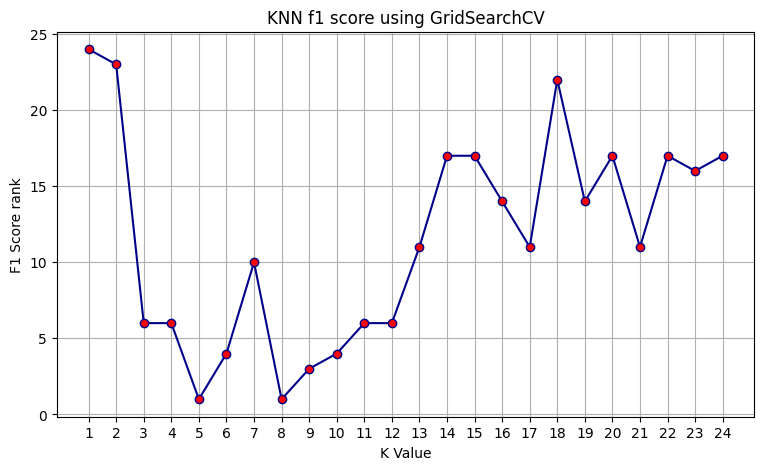

In [47]:
plt.figure(figsize=(9, 5))
plt.plot(range(1,25),knn_grid_cv.cv_results_['rank_test_score'], color='darkblue', marker='o', markerfacecolor='r')
plt.title('KNN f1 score using GridSearchCV')
plt.xlabel('K Value')
plt.ylabel('F1 Score rank')
plt.grid()
plt.xticks(range(1,25))
plt.show()

In [40]:
knn_grid_cv.best_params_

{'n_neighbors': 5}